In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
sns.set()

In [193]:
df = pd.read_csv(r'C:\Users\Maam\Desktop\CC IP Live Project\DS_DATESET.csv')
df.head()

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,...,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile,How Did You Hear About This Internship?,Label
0,Barron,Harnes,Kolhapur,Maharashtra,416004,24/09/2000,19,Male,bharnes0@harvard.edu,6345186600,...,HTML/CSS,Yes,No,NaN,6,10,NaN,NaN,Twitter,ineligible
1,Velma,Allone,Pune,Maharashtra,411011,23/10/1997,22,Female,vallone1@i2i.jp,2808753102,...,PHP,No,Yes,NaN,10,7,NaN,NaN,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,6/2/1996,24,Male,tscotland2@opensource.org,2945231918,...,C,No,No,NaN,8,6,NaN,NaN,Twitter,ineligible
3,Retha,Proud,Solapur,Maharashtra,413224,26/12/1999,20,Female,rproud3@flavors.me,7507196200,...,PHP,No,Yes,NaN,9,6,NaN,NaN,Twitter,ineligible
4,Del,Pearse,Sangli,Maharashtra,416436,21/09/1996,23,Female,dpearse4@sakura.ne.jp,6643884281,...,Python,No,Yes,NaN,8,6,NaN,NaN,Facebook,ineligible


In [194]:
y = df.Label
y.head()

0    ineligible
1      eligible
2    ineligible
3    ineligible
4    ineligible
Name: Label, dtype: object

In [195]:
df = df.drop(['Email Address', 'Last Name', 'First Name', 'State', 'Course Type', 'Current Employment Status', 'Zip Code', 'Contact Number', 'Emergency Contact Number'], axis=1)

In [196]:
df = df.dropna(axis=1)

In [197]:
df.info()
pp = PdfPages('visualization-output.pdf')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   City                                                    10000 non-null  object 
 1   DOB [DD/MM/YYYY]                                        10000 non-null  object 
 2   Age                                                     10000 non-null  int64  
 3   Gender                                                  10000 non-null  object 
 4   College name                                            10000 non-null  object 
 5   University Name                                         10000 non-null  object 
 6   Degree                                                  10000 non-null  object 
 7   Major/Area of Study                                     10000 non-null  object 
 8   Which-year are you studying in?      

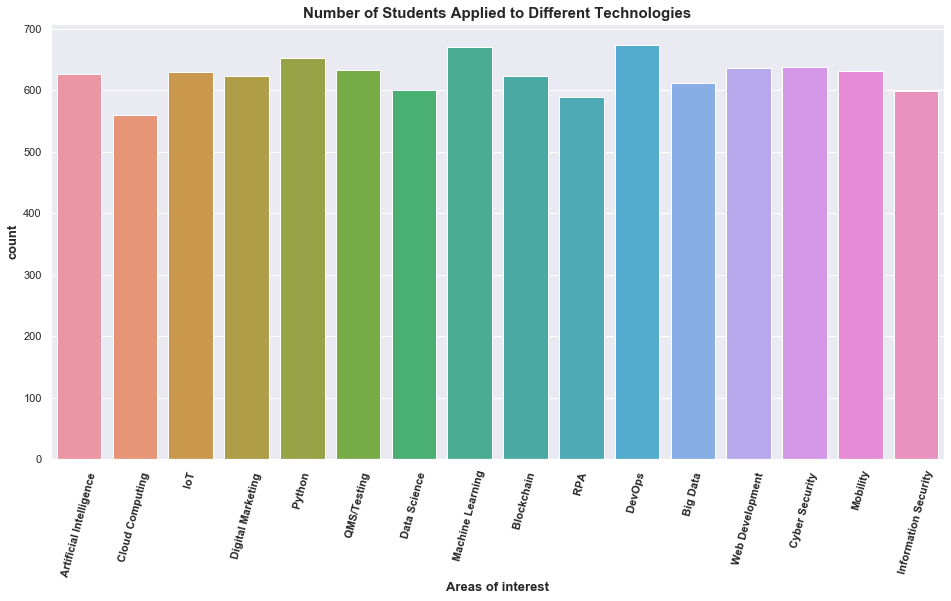

In [198]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,8))
plt.xticks(rotation=75, fontweight='bold')
plt.xlabel('', fontsize=13, fontweight='bold')
plt.ylabel('', fontsize=13, fontweight='bold')
plt.title('Number of Students Applied to Different Technologies', fontsize=15, fontweight='bold')
sns.countplot(df['Areas of interest'])
pp.savefig()

Know python:  66
Do not know python:  535


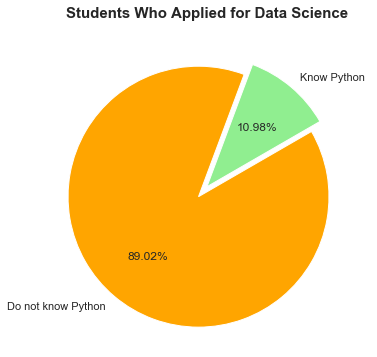

In [199]:
ds = df[df['Areas of interest']=='Data Science ']
know_python = ds['Programming Language Known other than Java (one major)']=='Python'
other = ds['Programming Language Known other than Java (one major)']!='Python'
print('Know python: ', know_python.sum())
print('Do not know python: ', other.sum())
plt.figure(figsize=(12,6))
categories = know_python.sum(), other.sum()
lab = 'Know Python', 'Do not know Python'
plt.pie([x for x in categories], labels=lab, colors=['Lightgreen', 'Orange'], startangle=30, autopct='%.2f%%', explode=[0,0.1]) 
plt.title('Students Who Applied for Data Science', fontsize=15, fontweight='bold')
pp.savefig()

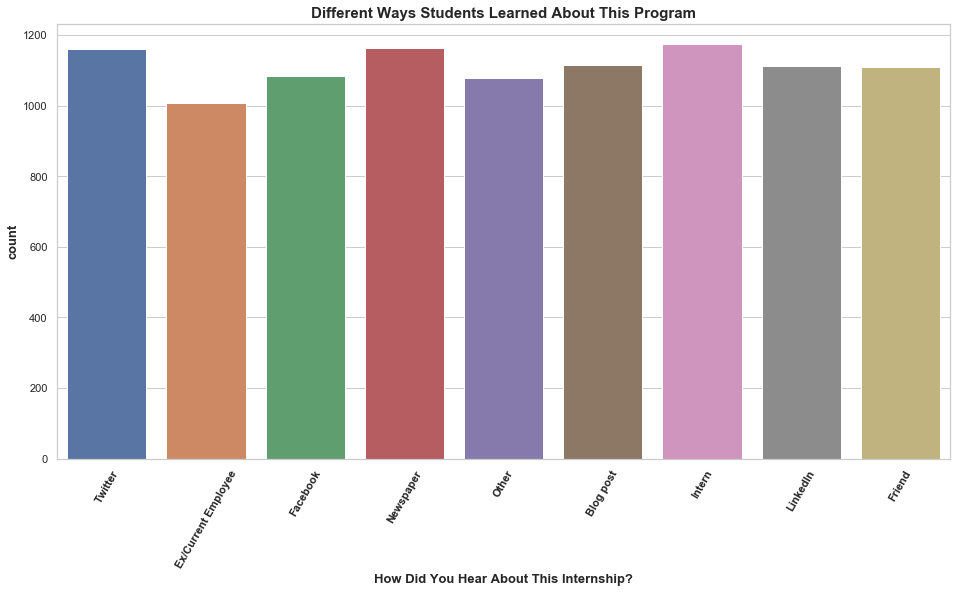

In [200]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.xticks(rotation=60, fontweight='bold')
plt.xlabel('', fontsize=13, fontweight='bold')
plt.ylabel('', fontsize=13, fontweight='bold')
plt.title('Different Ways Students Learned About This Program', fontsize=15, fontweight='bold')
sns.countplot(df['How Did You Hear About This Internship?'])
pp.savefig()

C:\Users\Maam\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


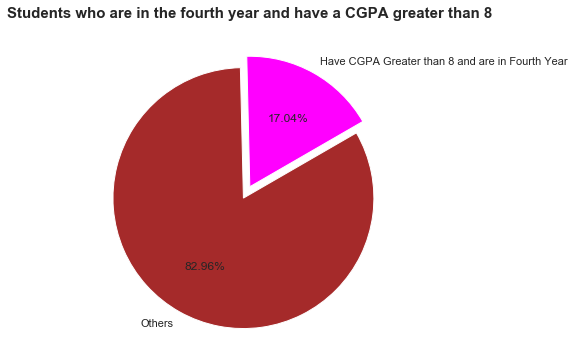

In [201]:
df.rename(columns = {'CGPA/ percentage':'CGPA'}, inplace = True)
df.rename(columns = {'Which-year are you studying in?':'Year'}, inplace = True)
dcy = df[(df['CGPA'] >= 8.0) & (df['Year'] == 'Fourth-year')]
other = df[(df['CGPA'] < 8.0) | (df['Year'] != 'Fourth-year')]

plt.figure(figsize=(12,6))
categories = dcy.count().unique(), other.count().unique()
lab = 'Have CGPA Greater than 8 and are in Fourth Year', 'Others'
plt.pie([x for x in categories], labels=lab, colors=['Magenta', 'Brown'], startangle=30, autopct='%.2f%%', explode=[0,0.1]) 
plt.title('Students who are in the fourth year and have a CGPA greater than 8', fontsize=15, fontweight='bold')
pp.savefig()

C:\Users\Maam\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


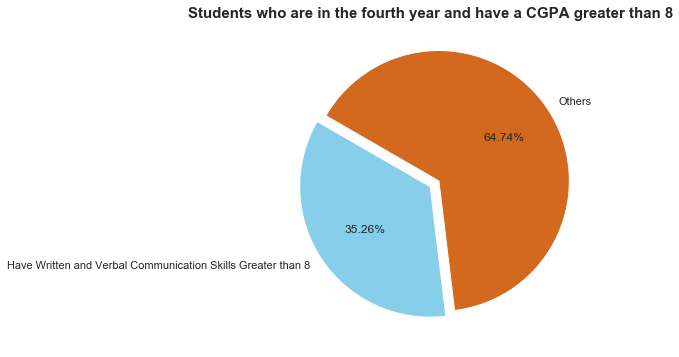

In [202]:
df.rename(columns = {'Rate your written communication skills [1-10]':'Written'}, inplace = True)
df.rename(columns = {'Rate your verbal communication skills [1-10]':'Verbal'}, inplace = True)
dm = df[df['Areas of interest']=='Digital Marketing ']
dvw = dm[(dm['Written'] >= 8.0) & (dm['Verbal'] >= 8.0)]
other = dm[(dm['Written'] < 8.0) | (dm['Verbal'] < 8.0)]

plt.figure(figsize=(12,6))
categories = dvw.count().unique(), other.count().unique()
lab = 'Have Written and Verbal Communication Skills Greater than 8', 'Others'
plt.pie([x for x in categories], labels=lab, colors=['Skyblue', 'Chocolate'], startangle=150, autopct='%.2f%%', explode=[0,0.08]) 
plt.title('Students who are in the fourth year and have a CGPA greater than 8', fontsize=15, fontweight='bold')
pp.savefig()

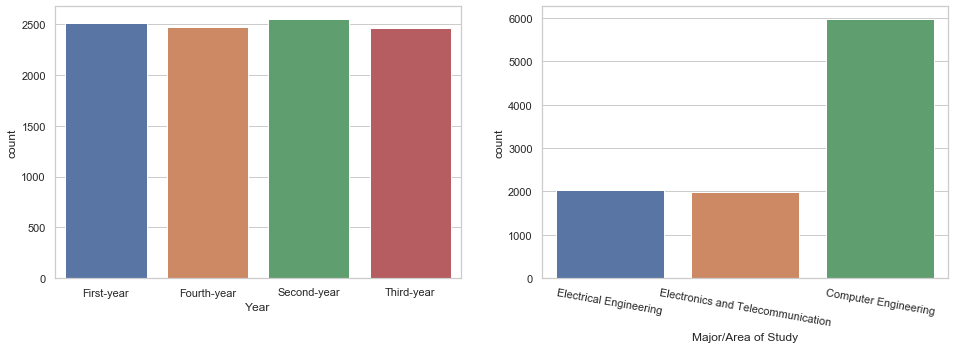

In [203]:
f, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(df['Year'].sort_values(), ax=axes[0])
f2 = sns.countplot(df['Major/Area of Study'], ax=axes[1])
f2.set_xticklabels(labels=df['Major/Area of Study'].unique(), rotation=-10)
pp.savefig()

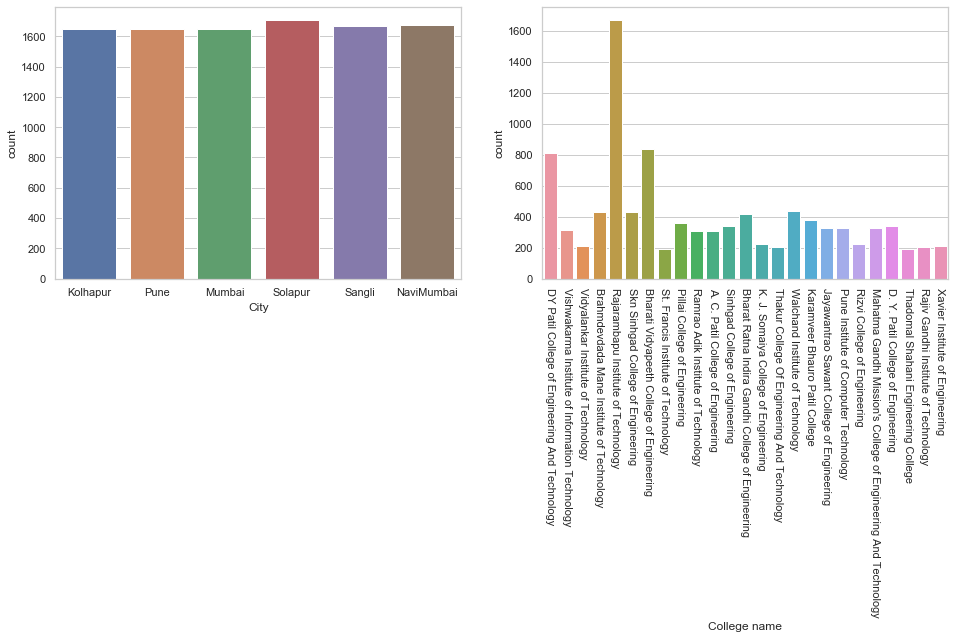

In [204]:
f, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(df['City'], ax=axes[0])
g2 = sns.countplot(df['College name'], ax=axes[1])
g2.set_xticklabels(labels=df['College name'].unique(), rotation=-90)
pp.savefig()

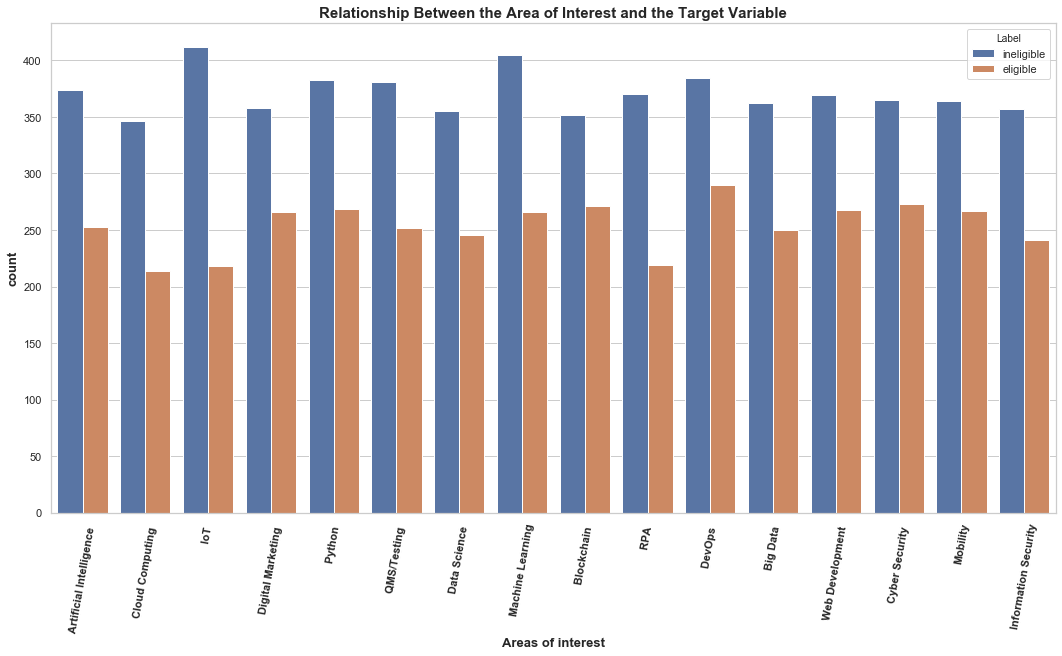

In [205]:
sns.set_style("whitegrid")
plt.figure(figsize=(18,9))
plt.xticks(rotation=80, fontweight='bold')
plt.xlabel('', fontsize=13, fontweight='bold')
plt.ylabel('', fontsize=13, fontweight='bold')
plt.title('Relationship Between the Area of Interest and the Target Variable', fontsize=15, fontweight='bold')
sns.countplot(x="Areas of interest", hue='Label', data=df)
pp.savefig()

[490] [518] [561] [464] [550] [496] [453] [497] [1470] [1536] [1449] [1516]


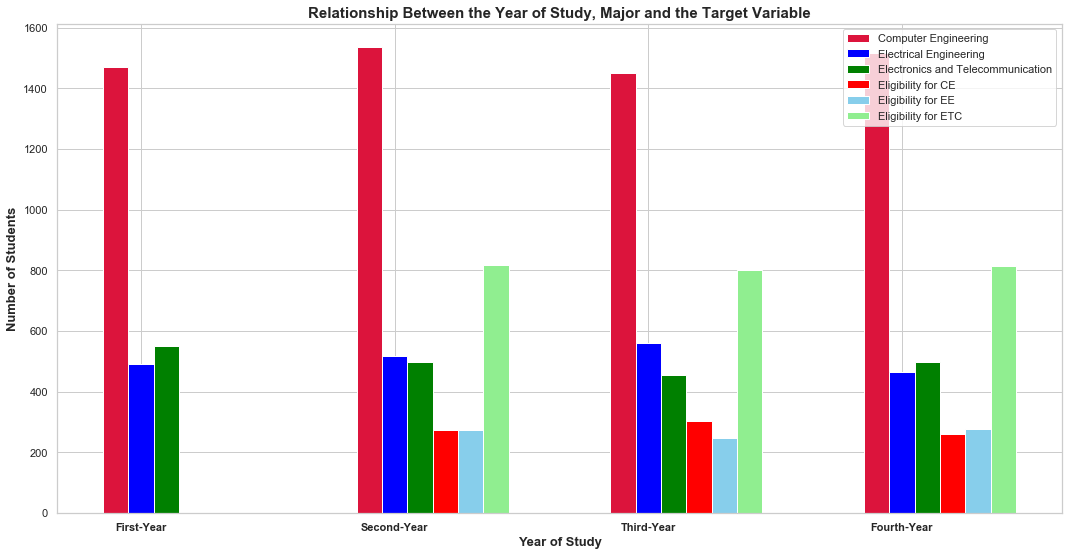

In [206]:

fe = df[(df['Year'] == 'First-year') & (df['Major/Area of Study'] == 'Electrical Engineering')].count().unique()
se = df[(df['Year'] == 'Second-year') & (df['Major/Area of Study'] == 'Electrical Engineering')].count().unique()
te = df[(df['Year'] == 'Third-year') & (df['Major/Area of Study'] == 'Electrical Engineering')].count().unique()
fie = df[(df['Year'] == 'Fourth-year') & (df['Major/Area of Study'] == 'Electrical Engineering')].count().unique()

fec = df[(df['Year'] == 'First-year') & (df['Major/Area of Study'] == 'Electronics and Telecommunication')].count().unique()
sec = df[(df['Year'] == 'Second-year') & (df['Major/Area of Study'] == 'Electronics and Telecommunication')].count().unique()
tec = df[(df['Year'] == 'Third-year') & (df['Major/Area of Study'] == 'Electronics and Telecommunication')].count().unique()
fiec = df[(df['Year'] == 'Fourth-year') & (df['Major/Area of Study'] == 'Electronics and Telecommunication')].count().unique()

fc = df[(df['Year'] == 'First-year') & (df['Major/Area of Study'] == 'Computer Engineering')].count().unique()
sc = df[(df['Year'] == 'Second-year') & (df['Major/Area of Study'] == 'Computer Engineering')].count().unique()
tc = df[(df['Year'] == 'Third-year') & (df['Major/Area of Study'] == 'Computer Engineering')].count().unique()
fic = df[(df['Year'] == 'Fourth-year') & (df['Major/Area of Study'] == 'Computer Engineering')].count().unique()

print(fe, se, te, fie, fec, sec, tec, fiec, fc, sc, tc, fic)

ce = [1470, 1536, 1449, 1516]
ee = [490, 518, 561, 464]
ece = [550, 496, 453, 497]
el_ce = [0, 274, 302, 259]
el_ee = [0, 273, 246, 275]
el_ece = [0, 818, 801, 815]
major=ce,ee,ece
barWidth = 0.1
r1 = np.arange(len(ce))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]


sns.set_style("whitegrid")
plt.figure(figsize=(18,9))
plt.xticks([r + barWidth for r in range(len(ce))], ['First-Year', 'Second-Year', 'Third-Year', 'Fourth-Year'], fontweight='bold')
plt.xlabel('Year of Study', fontsize=13, fontweight='bold')
plt.ylabel('Number of Students', fontsize=13, fontweight='bold')
plt.title('Relationship Between the Year of Study, Major and the Target Variable', fontsize=15, fontweight='bold')
plt.bar(r1, ce, color='crimson', width=barWidth, label = 'Computer Engineering')
plt.bar(r2, ee, color='blue', width=barWidth, label = 'Electrical Engineering')
plt.bar(r3, ece, color='green', width=barWidth, label = 'Electronics and Telecommunication')
plt.bar(r4, el_ce, color='red', width=barWidth, label = 'Eligibility for CE')
plt.bar(r5, el_ee, color='skyblue', width=barWidth, label = 'Eligibility for EE')
plt.bar(r6, el_ece, color='lightgreen', width=barWidth, label = 'Eligibility for ETC')
plt.legend()
pp.savefig()

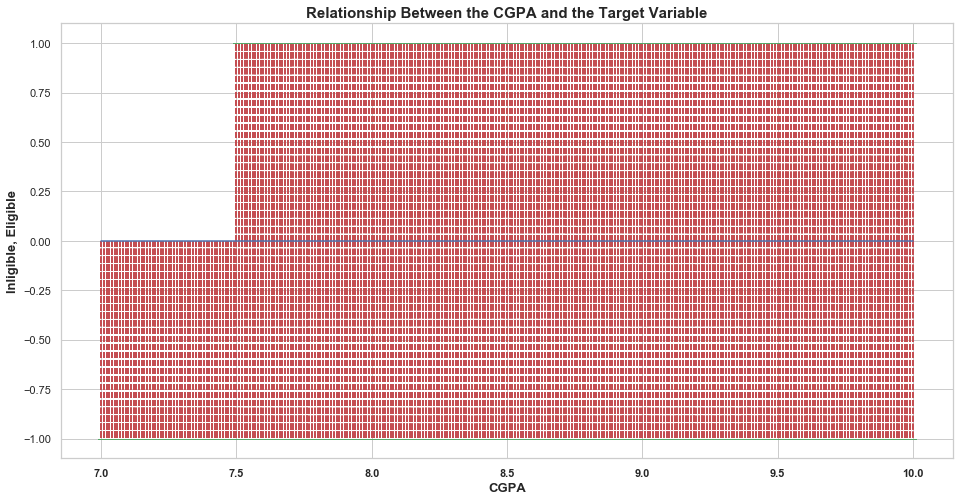

In [207]:
Label_dict = { 'eligible' : 1, 'ineligible' : -1}
df['Label_Encoded'] = df.Label.map(Label_dict)
plt.figure(figsize=(16,8))
plt.xticks(fontweight='bold')
plt.xlabel('CGPA', fontsize=13, fontweight='bold')
plt.ylabel('Inligible, Eligible', fontsize=13, fontweight='bold')
plt.title('Relationship Between the CGPA and the Target Variable', fontsize=15, fontweight='bold')
h = plt.stem(df['CGPA'], df['Label_Encoded'], markerfmt='g_', linefmt='r--', basefmt='b', use_line_collection=True)
pp.savefig()
pp.close()